# NOx 데이터 특성 파악 노트북

이 노트북은 0.Data 폴더의 csv 파일과 label.txt를 활용하여 데이터의 특성(구조, 컬럼명, 타입, 결측치, 분포 등)을 빠르게 파악할 수 있도록 구성되어 있습니다.

In [11]:
# 라이브러리 임포트 및 데이터 로드
import pandas as pd
import numpy as np
import os
DATA_DIR = './0.Data'
files = [f for f in os.listdir(DATA_DIR) if f.endswith('.csv')]
label_path = os.path.join(DATA_DIR, 'label.txt')
with open(label_path, 'r', encoding='utf-8') as f:
    labels = [line.strip() for line in f if line.strip()]
# 첫 번째 파일 예시로 로드
file_path = os.path.join(DATA_DIR, files[0])
df = pd.read_csv(file_path)
if len(labels) == df.shape[1] - 1:
    df.columns = ['timestamp'] + labels

## 1. 데이터 구조 및 컬럼 정보

In [12]:
print('데이터 shape:', df.shape)
print('컬럼명:', df.columns.tolist())
df.info()

데이터 shape: (7131, 57)
컬럼명: ['timestamp', '1. Main Steam Flow', '2. Main Steam Pressure', '3. AIR FLOW', '4. AIR & FUEL GAS PRESSURE', '5. Instrument Air Pressure', '6. BOILER DRUM LEVEL', '7. BOILER DRUM PRESS', '8. Air Control Valve Opening (%)', '9. T1', '10. T2', '11. T3', '12. P1', '13. P2', '14. P3', '15. UREA FLOW (L/H)', '16. UREA FLOW (T/H)', '17. FEEDER', '18. STOKER', '19. Damper Open (%)', '20. Duct_Pressure (mmH2O)', '21. Gas_Temp_In (℃)', '22. Gas_Temp_Out (℃)', '23. Lower Heating Value (kcal/kg)', '24. CO_Furnace (ppm)', '25. Bunker_AirFlow (Nm³/h)', '26. Bunker_Damper_Open (%)', '27. Bunker_Air_Temp (℃)', '28. Bunker_Air_Pressure (mmH2O)', '29. SAH_Load (%)', '30. SAH_Temp_Out (℃)', '31. SecAir_Pressure (mmH2O)', '32. MainSteamFlow_OUT (%)', '33. MainSteamFlow_PV (T/h)', '34.', '35.', '36.', '37.', '38.', '39.', '40. NOx', '41. CO', '42. DUST (MGm)', '43. NOx (ppm)', '44. CO_TMS (ppm)', '45. SOx (ppm)', '46. O2 (%)', '47. HCL (ppm)', '48.', '49.', '50.', '51.', '52.', '5

## 2. 결측치 및 데이터 타입 분석

In [13]:
# 1. 결측치 평균값으로 대체
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# 분산이 0이거나 NaN, 고유값 2 이하 컬럼 제거
drop_cols = [col for col in numeric_cols if df[col].var() == 0 or pd.isna(df[col].var()) or df[col].nunique() <= 2]
if drop_cols:
    print(f'분산 0/NaN 또는 고유값 적은 컬럼 제거: {drop_cols}')
    df = df.drop(columns=drop_cols)
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in drop_cols]
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print('결측치 평균값 대체 완료')
# 2. IQR 기반 이상치 제거
# def remove_outliers_iqr(df, cols):
#     for col in cols:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower = Q1 - 1.5 * IQR
#         upper = Q3 + 1.5 * IQR
#         df = df[(df[col] >= lower) & (df[col] <= upper)]
#     return df
# df = remove_outliers_iqr(df, numeric_cols)
print('IQR 이상치 제거 완료')
# 3. MinMax 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print('MinMax 정규화 완료')
# 4. 상관관계 재분석
corr = df[numeric_cols].corr()
# NaN 상관관계 컬럼 원인 진단

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'  # macOS 한글 폰트 경로 예시
fontprop = fm.FontProperties(fname=font_path)
df.columns

분산 0/NaN 또는 고유값 적은 컬럼 제거: ['18. STOKER', '29. SAH_Load (%)', '32. MainSteamFlow_OUT (%)', '36.', '45. SOx (ppm)', '50.']
결측치 평균값 대체 완료
IQR 이상치 제거 완료
MinMax 정규화 완료


Index(['timestamp', '1. Main Steam Flow', '2. Main Steam Pressure',
       '3. AIR FLOW', '4. AIR & FUEL GAS PRESSURE',
       '5. Instrument Air Pressure', '6. BOILER DRUM LEVEL',
       '7. BOILER DRUM PRESS', '8. Air Control Valve Opening (%)', '9. T1',
       '10. T2', '11. T3', '12. P1', '13. P2', '14. P3', '15. UREA FLOW (L/H)',
       '16. UREA FLOW (T/H)', '17. FEEDER', '19. Damper Open (%)',
       '20. Duct_Pressure (mmH2O)', '21. Gas_Temp_In (℃)',
       '22. Gas_Temp_Out (℃)', '23. Lower Heating Value (kcal/kg)',
       '24. CO_Furnace (ppm)', '25. Bunker_AirFlow (Nm³/h)',
       '26. Bunker_Damper_Open (%)', '27. Bunker_Air_Temp (℃)',
       '28. Bunker_Air_Pressure (mmH2O)', '30. SAH_Temp_Out (℃)',
       '31. SecAir_Pressure (mmH2O)', '33. MainSteamFlow_PV (T/h)', '34.',
       '35.', '37.', '38.', '39.', '40. NOx', '41. CO', '42. DUST (MGm)',
       '43. NOx (ppm)', '44. CO_TMS (ppm)', '46. O2 (%)', '47. HCL (ppm)',
       '48.', '49.', '51.', '52.', '53.', '54.', '55.'

In [14]:
# 43번째 컬럼(NOx ppm) 기준 상관관계 높은 feature 순서대로 출력
nox_col_name = '43. NOx (ppm)'  # 0-based index, 43번째 컬럼명
print(f'NOx 컬럼명: {nox_col_name}')

corr_with_nox = corr[nox_col_name].drop(nox_col_name).abs().sort_values(ascending=False)
print(f'NOx(ppm)와 상관관계(절대값 기준)가 높은 feature 순위:')
print(corr_with_nox)


NOx 컬럼명: 43. NOx (ppm)
NOx(ppm)와 상관관계(절대값 기준)가 높은 feature 순위:
40. NOx                              0.875426
1. Main Steam Flow                   0.449082
4. AIR & FUEL GAS PRESSURE           0.422089
8. Air Control Valve Opening (%)     0.418704
23. Lower Heating Value (kcal/kg)    0.417230
3. AIR FLOW                          0.391027
11. T3                               0.348639
9. T1                                0.348183
41. CO                               0.345215
38.                                  0.341892
22. Gas_Temp_Out (℃)                 0.340447
37.                                  0.339969
26. Bunker_Damper_Open (%)           0.318093
44. CO_TMS (ppm)                     0.306197
56.                                  0.283271
53.                                  0.272560
27. Bunker_Air_Temp (℃)              0.257966
31. SecAir_Pressure (mmH2O)          0.253724
7. BOILER DRUM PRESS                 0.244544
52.                                  0.227248
2. Main Steam Pres

In [15]:
# selected_features 정의 확인 및 재생성
if 'corr_with_nox' in locals():
    selected_features = corr_with_nox[corr_with_nox >= 0.2].index.tolist()
    selected_features = selected_features[1:]
    print('selected_features:', selected_features)
else:
    print('corr_with_nox가 정의되어 있지 않습니다. 상관관계 분석 셀을 먼저 실행하세요.')

selected_features: ['1. Main Steam Flow', '4. AIR & FUEL GAS PRESSURE', '8. Air Control Valve Opening (%)', '23. Lower Heating Value (kcal/kg)', '3. AIR FLOW', '11. T3', '9. T1', '41. CO', '38.', '22. Gas_Temp_Out (℃)', '37.', '26. Bunker_Damper_Open (%)', '44. CO_TMS (ppm)', '56.', '53.', '27. Bunker_Air_Temp (℃)', '31. SecAir_Pressure (mmH2O)', '7. BOILER DRUM PRESS', '52.', '2. Main Steam Pressure', '15. UREA FLOW (L/H)', '49.', '24. CO_Furnace (ppm)', '30. SAH_Temp_Out (℃)']


In [31]:
# MLPRegressor(3개 hidden layer)로 시계열 예측 (16일 데이터에서 순서대로 80% 학습, 20% 테스트)
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 16일 데이터만 추출
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df['timestamp'], format='mixed').dt.date

target_date = pd.to_datetime('2025-09-16').date()
day_df = df[df['date'] == target_date].reset_index(drop=True)

# feature 선택
if 'selected_features' not in locals():
    selected_features = corr_with_nox[corr_with_nox >= 0.2].index.tolist()
    selected_features = selected_features[1:]

X = day_df[selected_features]
y = day_df[nox_col_name]

split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

mlp = MLPRegressor(hidden_layer_sizes=(64, 32, 16), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
y_train_pred_mlp = mlp.predict(X_train)

print('MLPRegressor 예측 결과:')
print('train MSE:', mean_squared_error(y_train, y_train_pred_mlp))
print('train R2:', r2_score(y_train, y_train_pred_mlp))

print('MSE:', mean_squared_error(y_test, y_pred_mlp))
print('R2:', r2_score(y_test, y_pred_mlp))

MLPRegressor 예측 결과:
train MSE: 0.00350777972173343
train R2: 0.6638478732980879
MSE: 0.007694861314429394
R2: 0.15253104112903526


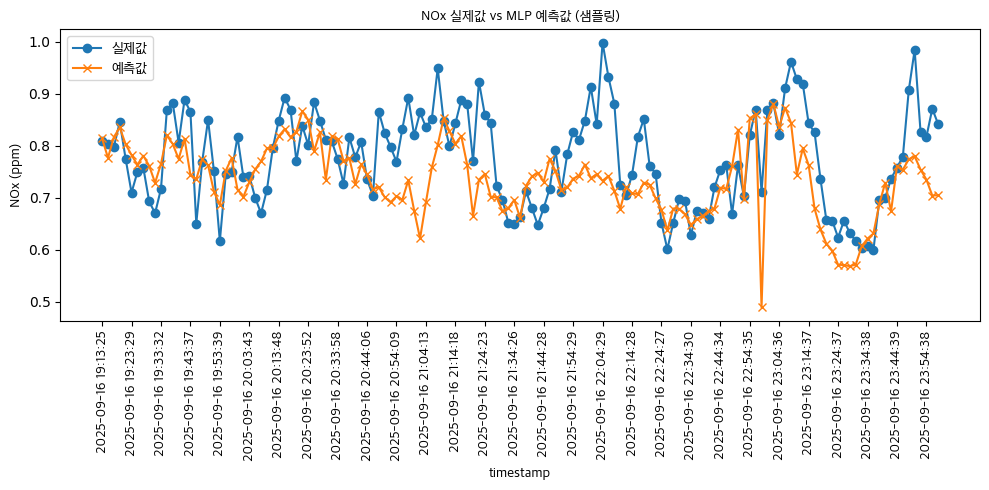

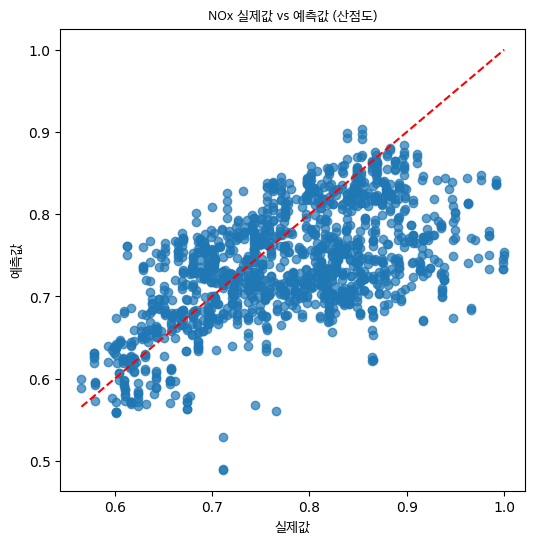

In [29]:
# MLP 예측 결과 시각화 (x축: timestamp, x축 라벨 5개마다 1개만 표시, NOx>0.4 필터 산점도)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'  # macOS 한글 폰트 경로 예시
fontprop = fm.FontProperties(fname=font_path)

# x축: 테스트셋의 timestamp
x_axis = day_df['timestamp'].iloc[split_idx:]

# 샘플링: 10개마다 1개씩만 시각화
sample_step = 10
x_axis_sampled = x_axis.iloc[::sample_step]
y_test_sampled = y_test.values[::sample_step]
y_pred_sampled = y_pred_mlp[::sample_step]

plt.figure(figsize=(10,5))
plt.plot(x_axis_sampled, y_test_sampled, label='실제값', marker='o')
plt.plot(x_axis_sampled, y_pred_sampled, label='예측값', marker='x')
plt.title('NOx 실제값 vs MLP 예측값 (샘플링)', fontproperties=fontprop)
plt.xlabel('timestamp', fontproperties=fontprop)
plt.ylabel('NOx (ppm)', fontproperties=fontprop)
plt.legend(prop=fontprop)

# x축 라벨 5개마다 1개만 표시
xticks_idx = range(0, len(x_axis_sampled), 5)
plt.xticks(ticks=xticks_idx, labels=x_axis_sampled.iloc[xticks_idx], rotation=90, fontproperties=fontprop)
plt.tight_layout()
plt.show()

# 산점도 비교 (NOx>0.4 필터)
mask = (y_test.values > 0.4)
plt.figure(figsize=(6,6))
plt.scatter(y_test.values[mask], y_pred_mlp[mask], alpha=0.7)
plt.plot([y_test.values[mask].min(), y_test.values[mask].max()], [y_test.values[mask].min(), y_test.values[mask].max()], 'r--')
plt.xlabel('실제값', fontproperties=fontprop)
plt.ylabel('예측값', fontproperties=fontprop)
plt.title('NOx 실제값 vs 예측값 (산점도)', fontproperties=fontprop)
plt.show()

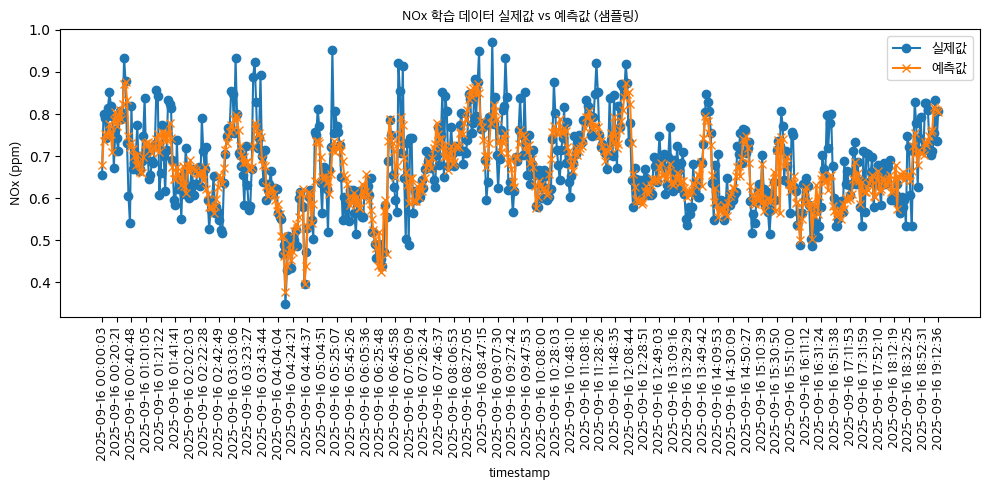

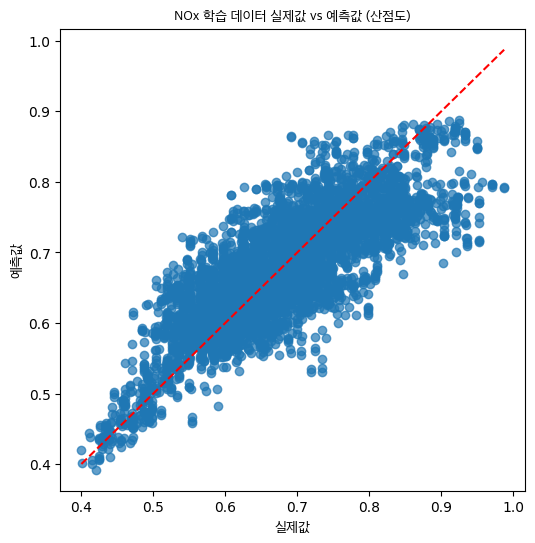

In [ ]:
# 학습 데이터 시각화 (x축: timestamp, x축 라벨 5개마다 1개만 표시, NOx>0.4 필터 산점도)
train_x_axis = day_df['timestamp'].iloc[:split_idx]
train_y = y_train
train_pred = mlp.predict(X_train)

# 샘플링: 10개마다 1개씩만 시각화
train_x_axis_sampled = train_x_axis.iloc[::sample_step]
train_y_sampled = train_y.values[::sample_step]
train_pred_sampled = train_pred[::sample_step]

plt.figure(figsize=(10,5))
plt.plot(train_x_axis_sampled, train_y_sampled, label='실제값', marker='o')
plt.plot(train_x_axis_sampled, train_pred_sampled, label='예측값', marker='x')
plt.title('NOx 학습 데이터 실제값 vs 예측값 (샘플링)', fontproperties=fontprop)
plt.xlabel('timestamp', fontproperties=fontprop)
plt.ylabel('NOx (ppm)', fontproperties=fontprop)
plt.legend(prop=fontprop)
xticks_idx = range(0, len(train_x_axis_sampled), 10)
plt.xticks(ticks=xticks_idx, labels=train_x_axis_sampled.iloc[xticks_idx], rotation=90, fontproperties=fontprop)
plt.tight_layout()
plt.show()

# 산점도 비교 (NOx>0.4 필터)
train_mask = (train_y.values > 0.4)
plt.figure(figsize=(6,6))
plt.scatter(train_y.values[train_mask], train_pred[train_mask], alpha=0.7)
plt.plot([train_y.values[train_mask].min(), train_y.values[train_mask].max()], [train_y.values[train_mask].min(), train_y.values[train_mask].max()], 'r--')
plt.xlabel('실제값', fontproperties=fontprop)
plt.ylabel('예측값', fontproperties=fontprop)
plt.title('NOx 학습 데이터 실제값 vs 예측값 (산점도)', fontproperties=fontprop)
plt.show()

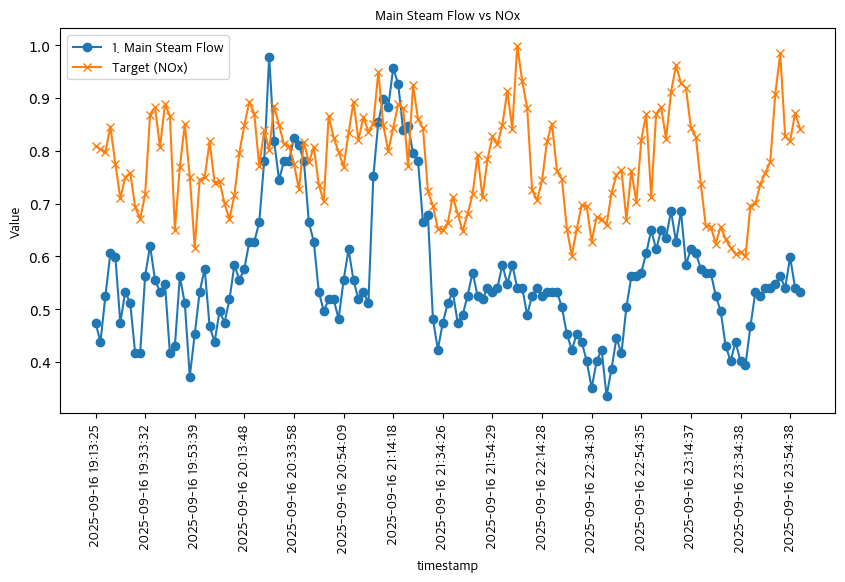

In [40]:
# X, y 준비
X_var = X['1. Main Steam Flow']  # 선택한 입력 변수

# x축 시간 설정 (timestamp가 day_df에 있다고 가정)
x_axis = day_df['timestamp'].iloc[split_idx:]  # 훈련/테스트 분리 후 테스트 구간

# y도 split 되어 있다고 가정 (y_test 사용)
# 샘플링: 10개마다 1개씩
sample_step = 10
x_axis_sampled = x_axis.iloc[::sample_step]
X_sampled = X_var.iloc[split_idx:][::sample_step]
y_sampled = y_test.values[::sample_step]  # 타겟 값 시각화

# 시각화
plt.figure(figsize=(10,5))
plt.plot(x_axis_sampled, X_sampled, label='1. Main Steam Flow', marker='o')
plt.plot(x_axis_sampled, y_sampled, label='Target (NOx)', marker='x')
plt.title('Main Steam Flow vs NOx', fontproperties=fontprop)
plt.xlabel('timestamp', fontproperties=fontprop)
plt.ylabel('Value', fontproperties=fontprop)
plt.legend(prop=fontprop)
# plt.grid(True)

xticks_idx = range(0, len(x_axis_sampled), 10)
plt.xticks(ticks=xticks_idx, labels=x_axis_sampled.iloc[xticks_idx], rotation=90, fontproperties=fontprop)

plt.show()


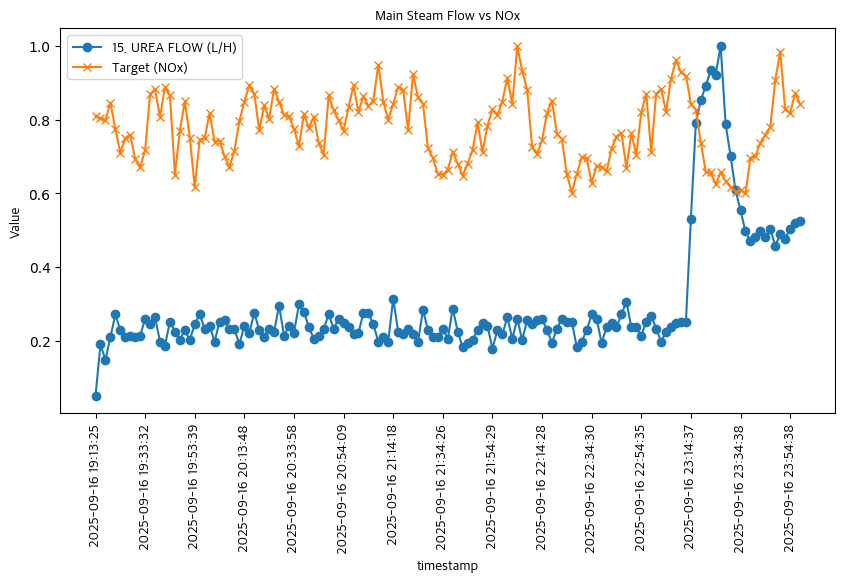

In [41]:

# X, y 준비
X_var = X['15. UREA FLOW (L/H)']  # 선택한 입력 변수

# x축 시간 설정 (timestamp가 day_df에 있다고 가정)
x_axis = day_df['timestamp'].iloc[split_idx:]  # 훈련/테스트 분리 후 테스트 구간

# y도 split 되어 있다고 가정 (y_test 사용)
# 샘플링: 10개마다 1개씩
sample_step = 10
x_axis_sampled = x_axis.iloc[::sample_step]
X_sampled = X_var.iloc[split_idx:][::sample_step]
y_sampled = y_test.values[::sample_step]  # 타겟 값 시각화

# 시각화
plt.figure(figsize=(10,5))
plt.plot(x_axis_sampled, X_sampled, label='15. UREA FLOW (L/H)', marker='o')
plt.plot(x_axis_sampled, y_sampled, label='Target (NOx)', marker='x')
plt.title('Main Steam Flow vs NOx', fontproperties=fontprop)
plt.xlabel('timestamp', fontproperties=fontprop)
plt.ylabel('Value', fontproperties=fontprop)
plt.legend(prop=fontprop)
# plt.grid(True)

xticks_idx = range(0, len(x_axis_sampled), 10)
plt.xticks(ticks=xticks_idx, labels=x_axis_sampled.iloc[xticks_idx], rotation=90, fontproperties=fontprop)

plt.show()


In [47]:
y_sampled

array([0.80905233, 0.80339463, 0.79773692, 0.84582744, 0.77510608,
       0.71004243, 0.74964639, 0.75813296, 0.69306931, 0.67043847,
       0.71711457, 0.86845827, 0.88260255, 0.80622348, 0.88826025,
       0.86562942, 0.65063649, 0.76944837, 0.85007072, 0.75106082,
       0.61669024, 0.74540311, 0.74964639, 0.8175389 , 0.7397454 ,
       0.74257426, 0.70014144, 0.67043847, 0.71570014, 0.79632249,
       0.84865629, 0.89250354, 0.8698727 , 0.7708628 , 0.8387553 ,
       0.8019802 , 0.88401697, 0.84865629, 0.81188119, 0.80905233,
       0.77510608, 0.72701556, 0.81612447, 0.77793494, 0.80763791,
       0.73550212, 0.70438472, 0.86562942, 0.82461103, 0.79773692,
       0.76944837, 0.8330976 , 0.89250354, 0.82036775, 0.86421499,
       0.83592645, 0.85148515, 0.94908062, 0.84865629, 0.79915134,
       0.84299859, 0.88826025, 0.88118812, 0.7708628 , 0.92362093,
       0.85997171, 0.84299859, 0.72277228, 0.69589816, 0.65205092,
       0.65063649, 0.66336634, 0.71287129, 0.68033946, 0.64780

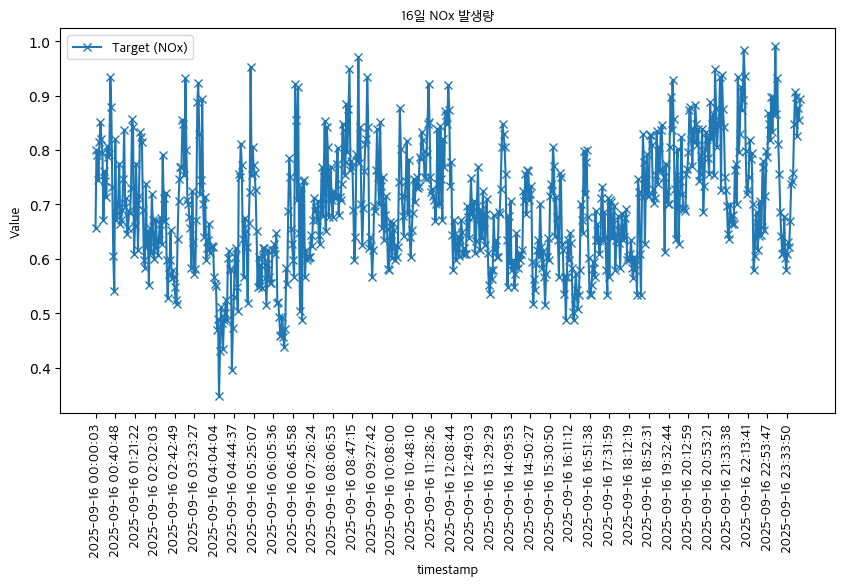

In [51]:


# x축 시간 설정 (timestamp가 day_df에 있다고 가정)
x_axis = day_df['timestamp']  # 훈련/테스트 분리 후 테스트 구간

# y도 split 되어 있다고 가정 (y_test 사용)
# 샘플링: 10개마다 1개씩
sample_step = 10
x_axis_sampled = x_axis.iloc[::sample_step]
X_sampled = X_var.iloc[::sample_step]
y_sampled = y.values[::sample_step]  # 타겟 값 시각화

# 시각화
plt.figure(figsize=(10,5))
plt.plot(x_axis_sampled, y_sampled, label='Target (NOx)', marker='x')
plt.title('16일 NOx 발생량', fontproperties=fontprop)
plt.xlabel('timestamp', fontproperties=fontprop)
plt.ylabel('Value', fontproperties=fontprop)
plt.legend(prop=fontprop)
# plt.grid(True)

xticks_idx = range(0, len(x_axis_sampled), 20)
plt.xticks(ticks=xticks_idx, labels=x_axis_sampled.iloc[xticks_idx], rotation=90, fontproperties=fontprop)

plt.show()
